# Tipos de filtros FIR de fase lineal y sus aplicaciones
<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 

En este notebook se ejemplifica el diseño de filtros FIR simétricos. Se diseñarán filtros de los 4 tipos de simetría y se propondrán aplicaciones concretas para cada uno.

* Análisis de la respuesta en frecuencia: [group_delay](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.group_delay), [plot_plantilla](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.plot_plantilla)
* Funciones de diseño digital [fir_design_ls](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/filtros_digitales/index.html#pytc2.filtros_digitales.fir_design_ls), [fir_design_pm](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/filtros_digitales/index.html#pytc2.filtros_digitales.fir_design_pm)


## Introducción

En los notebooks anteriores se presentó que la respuesta de fase de un filtro FIR será **perfectamente** lineal si su respuesta al impulso presenta algún tipo de simetría, par o impar, respecto a la muestra $M$-ésima. Por otro lado, la respuesta de módulo también presentará particularidades si **el tamaño** de dicha respuesta es par o impar. Ambas propiedades de la respuesta al impulso terminan conformando la siguiente tabla que determina cuatro tipos de FIR's.

| **Tipo** | **Simetría** | **Longitud** | $M$ 
|----------|--------------|--------------|-------------------|
| **I**    | Par          | Impar        | $ \frac{L-1}{2} $ |
| **II**   | Par          | Par          | $ \frac{L}{2} $   |
| **III**  | Impar        | Impar        | $ \frac{L-1}{2} $ |
| **IV**   | Impar        | Par          | $ \frac{L}{2} $   |

Dado que la respuesta de fase es lineal, la demora o retardo del filtro será **constante** y de de $M$ muestras.

Recordando que la respuesta en frecuencia de un FIR se expresa como

$$
H(\Omega) = H_R(\Omega) \cdot e^{j \cdot \varphi(\Omega)}
$$

siendo

$$
H_R(\Omega) = Q(\Omega) \cdot A(\Omega)
$$

siendo

$$
A(\Omega) = \sum_{k=0}^{M-1} a(k) \cdot \cos(k \Omega)
$$

entonces la respuesta de módulo estará condicionada al tipo de filtro FIR según la tabla que se muestra a continuación

| **Tipo** | $ Q(\Omega) $ | $H_R(0)$ | $H_R(\pi)$ | Preferencias |
|----------|----------|------------|---------------|---------------|
| **I**    | 1 | $A(\Omega)$        | $A(\Omega)$          | LP-HP-BP |
| **II**   | $ \cos{(\Omega/2)} $ | $A(\Omega)$        | 0          | LP-BP         |
| **III**  | $ \sin{(\Omega)} $ | 0        | 0          | Hilbert - Derivador       |
| **IV**   | $ \sin{(\Omega/2)} $ | 0        | $A(\Omega)$          | Hilbert - Derivador       |


### Algoritmos de diseño sugeridos

Desde el punto de vista del usuario diseñador de filtros, los dos métodos más eficientes son claramente los que permiten especificar directamente la plantilla de requerimientos como argumento. Esto significa que siempre será preferible el algoritmo de [Parks-Mc Clellan](PM_Remez_Filter_Design.ipynb) en primera instancia. En caso de haber problemas de convergencia, se usará el enfoque de [cuadrados mínimos](Least_Squares_Filter_Design), y solo en caso de ser necesario queda el [método de ventanas](ejnb_filtros_FIR.ipynb). Este último método, si bien es menos práctico ya que no podemos indicarle la plantilla de forma directa, garantiza el diseño de un filtro FIR para cualquier requerimiento. Es, sin embargo, su única dificultad que calcule un filtro con una cantidad de coeficientes prohibitiva para la implementación práctica. Todos los métodos de diseño ya fueron explicados en detalle y están implementados en PyTC2.

En las siguientes celdas, se ejemplifican algunos diseños elementales para cada tipo de filtros (I-IV). Se finalizará este notebook con un ejemplo de aplicación de los tipos III y IV funcionando como derivadores y transformadores de Hilbert. Si bien estos tipos de FIR carecen de aplicación en una asignatura de Teoría de Redes o Circuitos donde se estudian filtros, son ampliamente utilizados en Comunicaciones analógicas y digitales por su practicidad para la demodulación de amplitud y/o fase.


## Ejemplos de diseño

### Pasabajos tipo I

Recordando que el tamaño en coeficientes ($L$) y el orden de un filtro FIR ($O$) se relacionan como $L = O + 1$. Entonces el siguiente filtro pasabajos cumplirá con la siguiente plantilla:

* $O$ = 22 (23 coeficientes)
* $f_p$ = 0.4 (fin de la banda de paso)
* $f_s$ = 0.6 (comienzo de la banda de detenida)
* ripple = 0.5 dB
* attenuation = 40 dB


Convergencia exitosa!


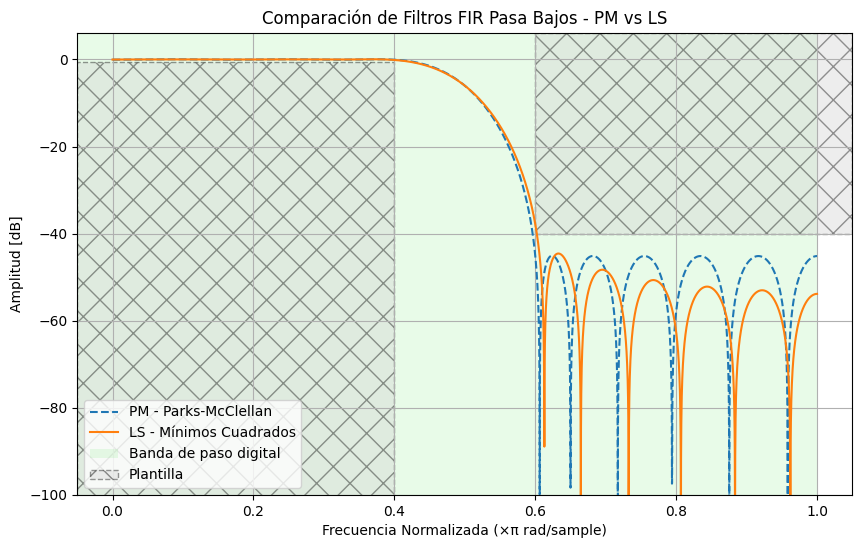

Ripple PM: 0.0965 dB
Ripple LS: 0.1628 dB
Atenuación PM: 45.0261 dB
Atenuación LS: 37.7599 dB


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

from pytc2.filtros_digitales import fir_design_pm, fir_design_ls
from pytc2.sistemas_lineales import plot_plantilla, group_delay

# Parámetros comunes del filtro Pasa Bajos
order = 22
fs = 2.0
fpass = 0.4
fstop = 0.6
ripple = 0.5  # dB
attenuation = 40  # dB
lgrid = 16

# Definir las bandas de paso y corte
band_edges = [0, fpass, fstop, 1.0]
desired = [1, 1, 0, 0]

# Desviaciones permisibles en dB
d = np.array([-ripple, -attenuation])  # En dB
d = 10**(d/20)  # Convertir de dB a lineal
d = np.array([(1-d[0]), d[1]])

# Diseño del filtro con PM
b_pm, _, _ = fir_design_pm(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type='lowpass')

# Diseño del filtro con LS
b_ls = fir_design_ls(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type='lowpass')

# Comparar la respuesta en frecuencia de ambos filtros
w, h_pm = freqz(b_pm, worN=8000)
w, h_ls = freqz(b_ls, worN=8000)

# Graficar ambas respuestas
plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, 20 * np.log10(np.abs(h_pm)), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, 20 * np.log10(np.abs(h_ls)), label='LS - Mínimos Cuadrados', linestyle='-')
plot_plantilla(filter_type = 'lowpass' , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)
plt.title('Comparación de Filtros FIR Pasa Bajos - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()

# Análisis de ripple y atenuación
min_bp_pm = np.min(20 * np.log10(np.abs(h_pm[w <= fpass * np.pi])))
ripple_pm = np.max(20 * np.log10(np.abs(h_pm[w <= fpass * np.pi]))) - min_bp_pm
attenuation_pm = min_bp_pm - np.max(20 * np.log10(np.abs(h_pm[w >= fstop * np.pi])))

min_bp_ls = np.min(20 * np.log10(np.abs(h_ls[w <= fpass * np.pi])))
ripple_ls = np.max(20 * np.log10(np.abs(h_ls[w <= fpass * np.pi]))) - min_bp_ls
attenuation_ls = min_bp_ls - np.max(20 * np.log10(np.abs(h_ls[w >= fstop * np.pi])))

print(f'Ripple PM: {ripple_pm:.4f} dB')
print(f'Ripple LS: {ripple_ls:.4f} dB')
print(f'Atenuación PM: {attenuation_pm:.4f} dB')
print(f'Atenuación LS: {attenuation_ls:.4f} dB')


### Pasabanda tipo I

La plantilla en este caso será:

* $O$ = 70 (71 coeficientes)
* $f_{s1}$ = 0.2 (fin de la banda de detenida)
* $f_{p1}$ = 0.3 (comienzo de la banda de paso)
* $f_{p2}$ = 0.5 (fin de la banda de paso)
* $f_{s1}$ = 0.6 (comienzo de la banda de detenida)
* ripple = 0.5 dB
* attenuation = 40 dB


Convergencia exitosa!


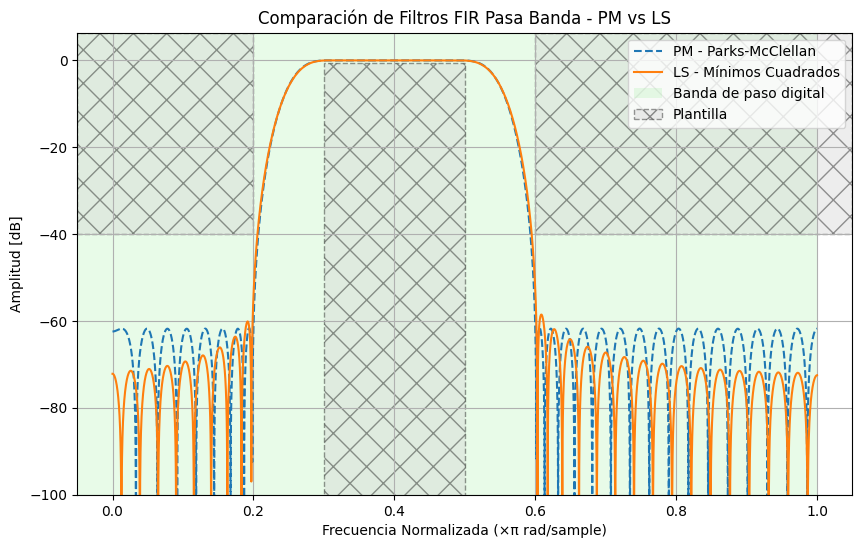

Ripple PM: 0.0143 dB
Ripple LS: 0.0267 dB
Atenuación PM: 61.5855 dB
Atenuación LS: 52.8917 dB


In [2]:
# Parámetros comunes del filtro Pasa Banda
order = 70  # Aumentamos el orden para mejor selectividad
fs = 2.0
fpass1 = 0.3  # Frecuencia de paso inferior
fpass2 = 0.5  # Frecuencia de paso superior
fstop1 = 0.2  # Frecuencia de corte inferior
fstop2 = 0.6  # Frecuencia de corte superior
ripple = 0.5  # dB
attenuation = 40  # dB
lgrid = 16

# Definir las bandas de paso y corte
band_edges = [0, fstop1, fpass1, fpass2, fstop2, 1.0]
desired = [0, 0, 1, 1, 0, 0]

# Desviaciones permisibles en dB
d = np.array([-ripple, -attenuation])  # En dB
d = 10**(d/20)  # Convertir de dB a lineal
d = np.array([(1-d[0]), d[1]])

# Diseño del filtro con PM
b_pm, _, _ = fir_design_pm(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type='multiband')

# Diseño del filtro con LS
b_ls = fir_design_ls(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type='multiband')

# Comparar la respuesta en frecuencia de ambos filtros
w, h_pm = freqz(b_pm, worN=8000)
w, h_ls = freqz(b_ls, worN=8000)

# Graficar ambas respuestas
plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, 20 * np.log10(np.abs(h_pm)), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, 20 * np.log10(np.abs(h_ls)), label='LS - Mínimos Cuadrados', linestyle='-')
plot_plantilla(filter_type = 'bandpass' , fpass = (fpass1, fpass2), ripple = ripple , fstop = (fstop1, fstop2), attenuation = attenuation, fs = fs)
plt.title('Comparación de Filtros FIR Pasa Banda - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()

# Análisis de ripple y atenuación
min_bp_pm = np.min(20 * np.log10(np.abs(h_pm[(w >= fpass1*np.pi) & (w <= fpass2*np.pi)])))
ripple_pm = np.max(20 * np.log10(np.abs(h_pm[(w >= fpass1*np.pi) & (w <= fpass2*np.pi)]))) - min_bp_pm
attenuation_pm = min_bp_pm - np.max(20 * np.log10(np.abs(h_pm[(w <= fstop1*np.pi) | (w >= fstop2*np.pi)])))

min_bp_ls = np.min(20 * np.log10(np.abs(h_ls[(w >= fpass1*np.pi) & (w <= fpass2*np.pi)])))
ripple_ls = np.max(20 * np.log10(np.abs(h_ls[(w >= fpass1*np.pi) & (w <= fpass2*np.pi)]))) - min_bp_ls
attenuation_ls = min_bp_ls - np.max(20 * np.log10(np.abs(h_ls[(w <= fstop1*np.pi) | (w >= fstop2*np.pi)])))

print(f'Ripple PM: {ripple_pm:.4f} dB')
print(f'Ripple LS: {ripple_ls:.4f} dB')
print(f'Atenuación PM: {attenuation_pm:.4f} dB')
print(f'Atenuación LS: {attenuation_ls:.4f} dB')


### Eliminabanda tipo I

La plantilla en este caso será la complementaria a la anterior, invirtiendo banda de paso por banda de detenida.


Convergencia exitosa!


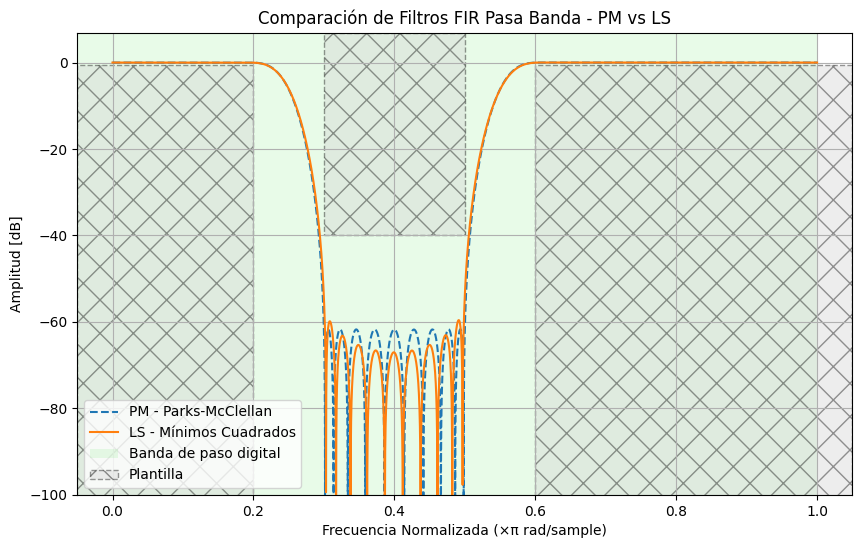

Ripple PM: 60.9960 dB
Ripple LS: 53.8364 dB
Atenuación PM: 0.7075 dB
Atenuación LS: 0.0242 dB


In [3]:
# Parámetros comunes del filtro Pasa Banda
order = 70  # Aumentamos el orden para mejor selectividad
fs = 2.0
fpass1 = 0.3  # Frecuencia de paso inferior
fpass2 = 0.5  # Frecuencia de paso superior
fstop1 = 0.2  # Frecuencia de corte inferior
fstop2 = 0.6  # Frecuencia de corte superior
ripple = 0.5  # dB
attenuation = 40  # dB
lgrid = 16

# Definir las bandas de paso y corte
band_edges = [0, fstop1, fpass1, fpass2, fstop2, 1.0]
desired = [1, 1, 0, 0, 1, 1]

# Desviaciones permisibles en dB
d = np.array([-ripple, -attenuation])  # En dB
d = 10**(d/20)  # Convertir de dB a lineal
d = np.array([(1-d[0]), d[1]])

# Diseño del filtro con PM
b_pm, _, _ = fir_design_pm(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type='multiband')

# Diseño del filtro con LS
b_ls = fir_design_ls(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type='multiband')

# Comparar la respuesta en frecuencia de ambos filtros
w, h_pm = freqz(b_pm, worN=8000)
w, h_ls = freqz(b_ls, worN=8000)

# Graficar ambas respuestas
plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, 20 * np.log10(np.abs(h_pm)), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, 20 * np.log10(np.abs(h_ls)), label='LS - Mínimos Cuadrados', linestyle='-')
plot_plantilla(filter_type = 'bandstop' , fstop = (fpass1, fpass2), ripple = ripple , fpass = (fstop1, fstop2), attenuation = attenuation, fs = fs)
plt.title('Comparación de Filtros FIR Pasa Banda - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()

# Análisis de ripple y atenuación
min_bp_pm = np.min(20 * np.log10(np.abs(h_pm[w <= fpass1*np.pi])))
ripple_pm = np.max(20 * np.log10(np.abs(h_pm[w <= fpass1*np.pi]))) - min_bp_pm
attenuation_pm = min_bp_pm - np.max(20 * np.log10(np.abs(h_pm[np.bitwise_and( w >= fpass1*np.pi, w <= fpass2*np.pi)])))

min_bp_ls = np.min(20 * np.log10(np.abs(h_ls[w <= fpass1*np.pi])))
ripple_ls = np.max(20 * np.log10(np.abs(h_ls[w <= fpass1*np.pi]))) - min_bp_ls
attenuation_ls = min_bp_ls - np.max(20 * np.log10(np.abs(h_ls[ np.bitwise_and( w >= fpass1*np.pi, w <= fpass2*np.pi)])))

print(f'Ripple PM: {ripple_pm:.4f} dB')
print(f'Ripple LS: {ripple_ls:.4f} dB')
print(f'Atenuación PM: {attenuation_pm:.4f} dB')
print(f'Atenuación LS: {attenuation_ls:.4f} dB')


### Derivador tipo III

La plantilla en este caso será:

* tipo derivador (Ftype = 'd', solo para tipos III y IV, define el orden)
* $O$ = 70 (71 coeficientes, orden tipo III)
* $f_{p1}$ = 0 (comienzo de la banda del derivador)
* $f_{p2}$ = 0.9 (fin de la banda del derivador)


Como se observa, el diseño no ha sido exitoso y se debe aumentar el orden y volver a intentar el diseño.

Convergencia exitosa!


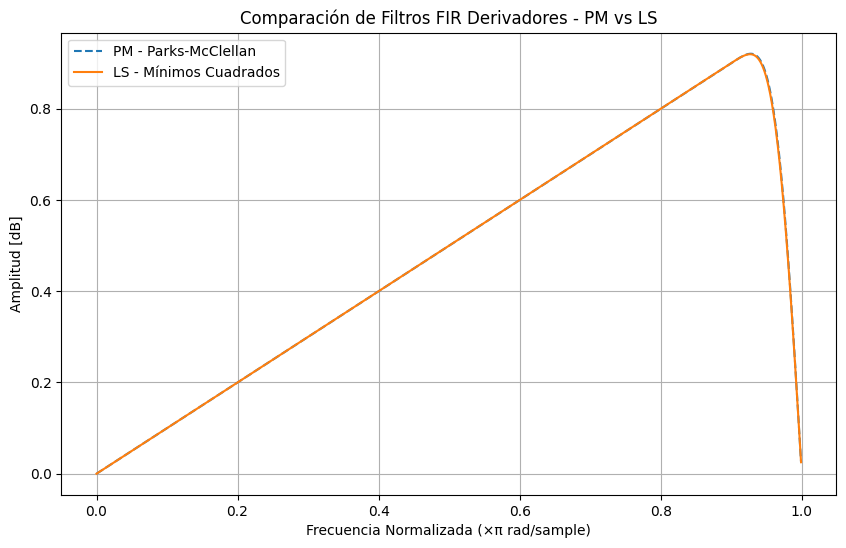

In [4]:
# Parámetros comunes del derivador FIR
Ftype = 'd'  # Derivador
order = 70  # Orden del filtro (debe ser par para tipo III)
fs = 2.0  # Frecuencia de muestreo
lgrid = 16  # Densidad del grid

# Bandas y especificaciones del derivador
band_edges = [0, 0.9]  # Bandas de diseño (en términos de frecuencia normalizada)
desired = [0, 1/np.pi]  # Respuesta ideal del derivador (pendiente lineal en la banda de paso)
W = [1., 1.]  # Peso en las bandas

# Diseño del filtro con PM
b_pm, _, _ = fir_design_pm(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Diseño del filtro con LS
b_ls = fir_design_ls(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Comparar la respuesta en frecuencia de ambos filtros
w, h_pm = freqz(b_pm, worN=1024)
w, h_ls = freqz(b_ls, worN=1024)

# Graficar ambas respuestas
plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, np.abs(h_pm), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, np.abs(h_ls), label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Comparación de Filtros FIR Derivadores - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()

b_derivador = b_pm
#b_derivador = b_ls

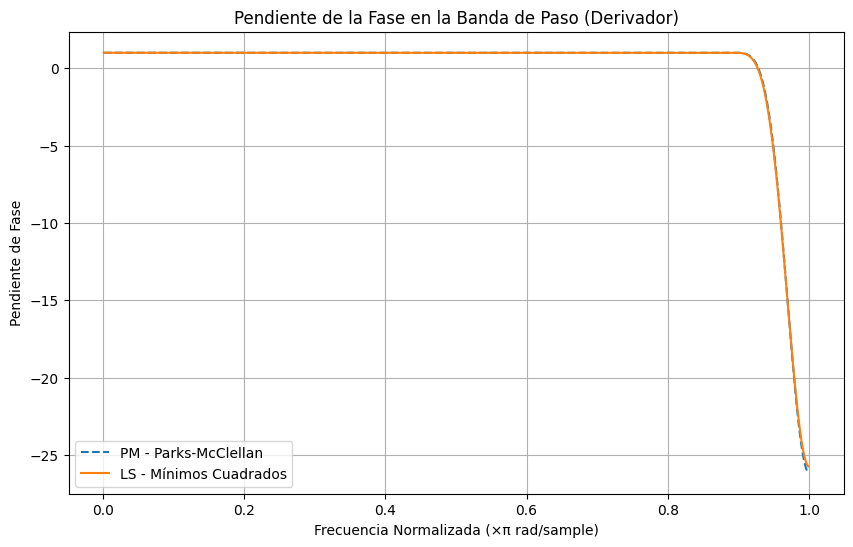

In [5]:
# Análisis de la pendiente en la banda de paso
slope_pm = np.diff(np.abs(h_pm)) / np.diff(w/np.pi)
slope_ls = np.diff(np.abs(h_ls)) / np.diff(w/np.pi)

fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.plot(w[1:]/np.pi, slope_pm, label='PM - Parks-McClellan', linestyle='--')
plt.plot(w[1:]/np.pi, slope_ls, label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Pendiente de la Fase en la Banda de Paso (Derivador)')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Pendiente de Fase')
plt.legend()
plt.grid()
plt.show()


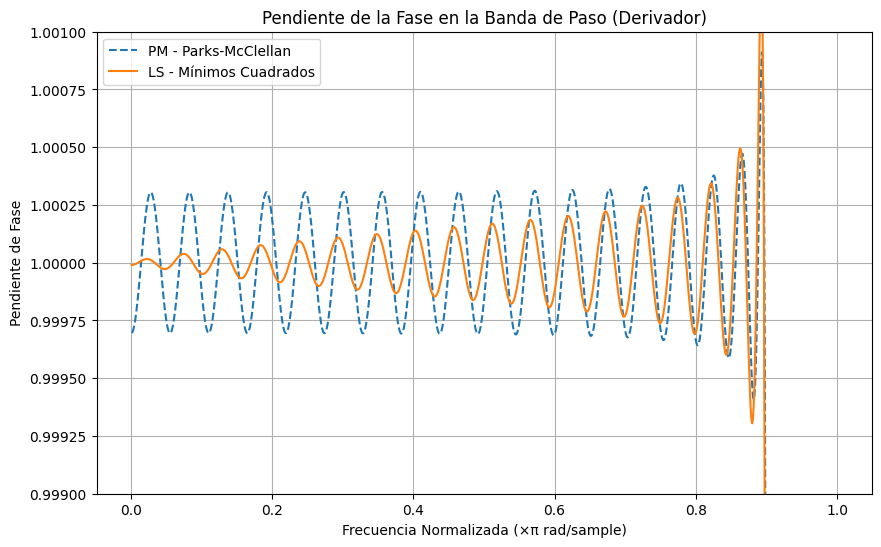

In [6]:
ax.set_ylim([0.999, 1.001])
fig

### Derivador tipo IV

La plantilla en este caso será:

* tipo derivador (Ftype = 'd', solo para tipos III y IV, define el orden)
* $O$ = 71 (72 coeficientes, orden tipo IV)
* $f_{p1}$ = 0 (comienzo de la banda del derivador)
* $f_{p2}$ = 1 (fin de la banda del derivador, toda la banda digital)


Convergencia exitosa!


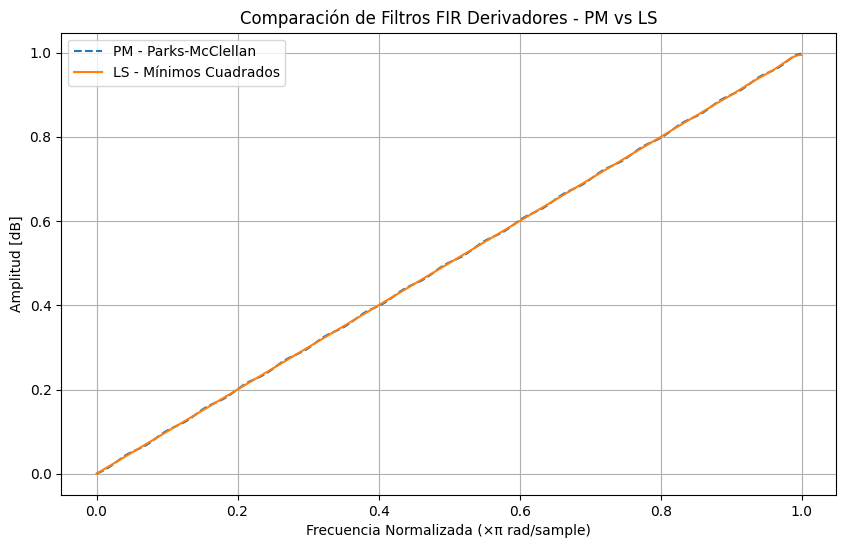

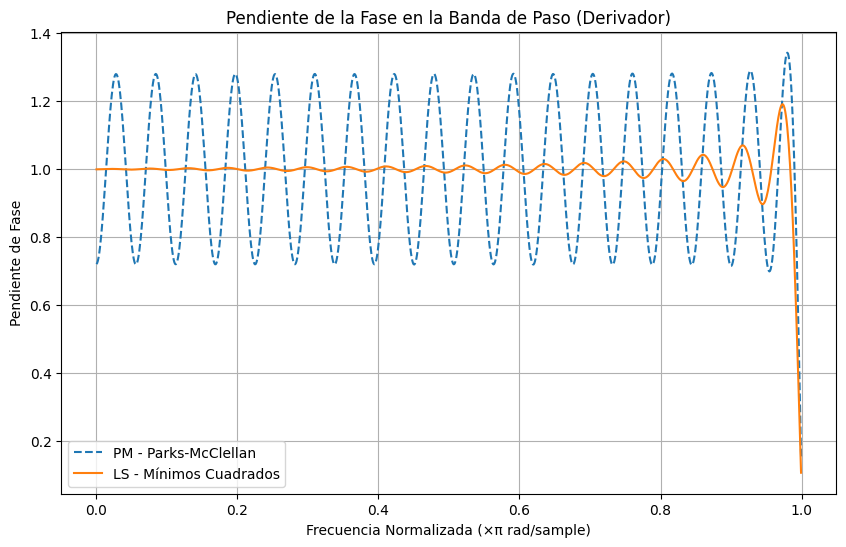

In [7]:
# Parámetros comunes del derivador FIR
Ftype = 'd'  # Derivador
order = 71  # Orden del filtro (debe ser par para tipo III)
fs = 2.0  # Frecuencia de muestreo
lgrid = 16  # Densidad del grid

# Bandas y especificaciones del derivador
band_edges = [0, 1.0]  # Bandas de diseño (en términos de frecuencia normalizada)
desired = [0, 1/np.pi]  # Respuesta ideal del derivador (pendiente lineal en la banda de paso)
W = [1., 1.]  # Peso en las bandas

# Diseño del filtro con PM
b_pm, _, _ = fir_design_pm(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Diseño del filtro con LS
b_ls = fir_design_ls(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Comparar la respuesta en frecuencia de ambos filtros
w, h_pm = freqz(b_pm, worN=1024)
w, h_ls = freqz(b_ls, worN=1024)

# Graficar ambas respuestas
plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, np.abs(h_pm), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, np.abs(h_ls), label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Comparación de Filtros FIR Derivadores - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()

# Análisis de la pendiente en la banda de paso
slope_pm = np.diff(np.abs(h_pm)) / np.diff(w/np.pi)
slope_ls = np.diff(np.abs(h_ls)) / np.diff(w/np.pi)

plt.figure(figsize=(10, 6))
plt.plot(w[1:]/np.pi, slope_pm, label='PM - Parks-McClellan', linestyle='--')
plt.plot(w[1:]/np.pi, slope_ls, label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Pendiente de la Fase en la Banda de Paso (Derivador)')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Pendiente de Fase')
plt.legend()
plt.grid()
plt.show()


### Transformador de Hilbert tipo III

La plantilla en este caso será:

* Hilbert (Ftype = 'h', solo para tipos III y IV, define el orden)
* $O$ = 70 (71 coeficientes, orden tipo III)
* $f_{p1}$ = 0.05 (comienzo de la banda de operación)
* $f_{p2}$ = 0.95 (fin de la banda)


Convergencia exitosa!


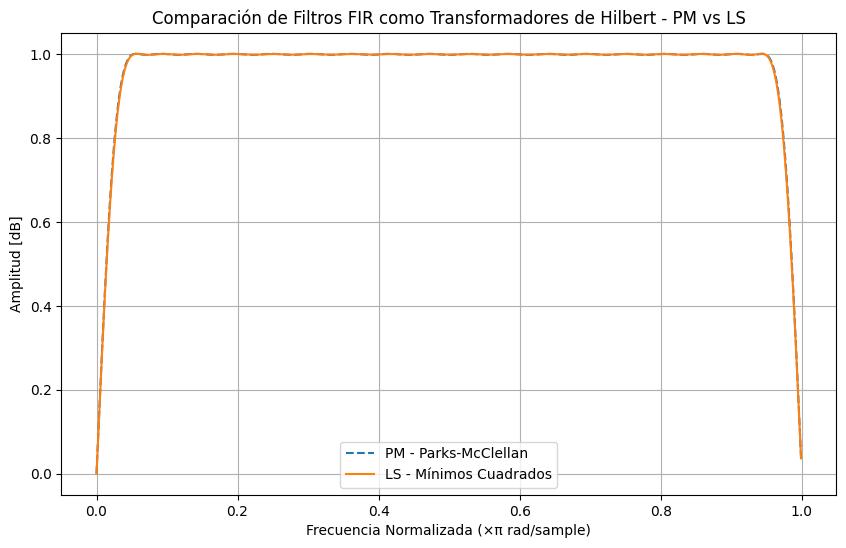

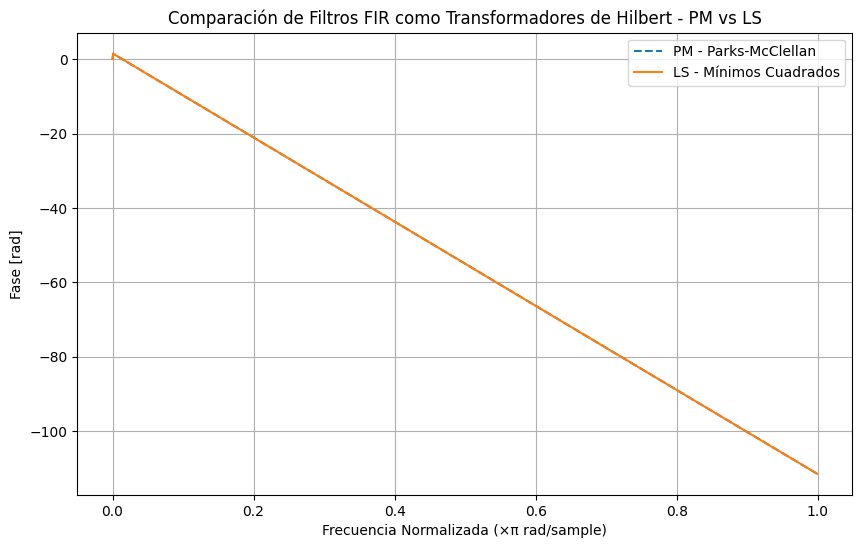

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from pytc2.filtros_digitales import fir_design_pm, fir_design_ls

# Parámetros comunes del derivador FIR
Ftype = 'h'  # Hilbert
order = 70  # Orden del filtro (debe ser par para tipo III)
fs = 2.0  # Frecuencia de muestreo
lgrid = 16  # Densidad del grid

# Bandas y especificaciones del derivador
band_edges = [0.05, 0.95]  # Bandas de diseño (en términos de frecuencia normalizada)
desired = [1., 1.]  # Respuesta ideal del derivador (pendiente lineal en la banda de paso)
W = [1., 1.]  # Peso en las bandas

# Diseño del filtro con PM
b_pm, _, _ = fir_design_pm(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Diseño del filtro con LS
b_ls = fir_design_ls(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Comparar la respuesta en frecuencia de ambos filtros
w, h_pm = freqz(b_pm, worN=1024)
w, h_ls = freqz(b_ls, worN=1024)

# Graficar ambas respuestas
plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, np.abs(h_pm), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, np.abs(h_ls), label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Comparación de Filtros FIR como Transformadores de Hilbert - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, np.unwrap(np.angle(h_pm)), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, np.unwrap(np.angle(h_ls)), label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Comparación de Filtros FIR como Transformadores de Hilbert - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Fase [rad]')
plt.legend()
plt.grid()
plt.show()


b_hilbert = b_pm
# b_hilbert = b_ls


### Transformador de Hilbert tipo IV

La plantilla en este caso será:

* Hilbert (Ftype = 'h', solo para tipos III y IV, define el orden)
* $O$ = 71 (72 coeficientes, orden tipo IV)
* $f_{p1}$ = 0.05 (comienzo de la banda de operación)
* $f_{p2}$ = 1 (fin de la banda)


Convergencia exitosa!


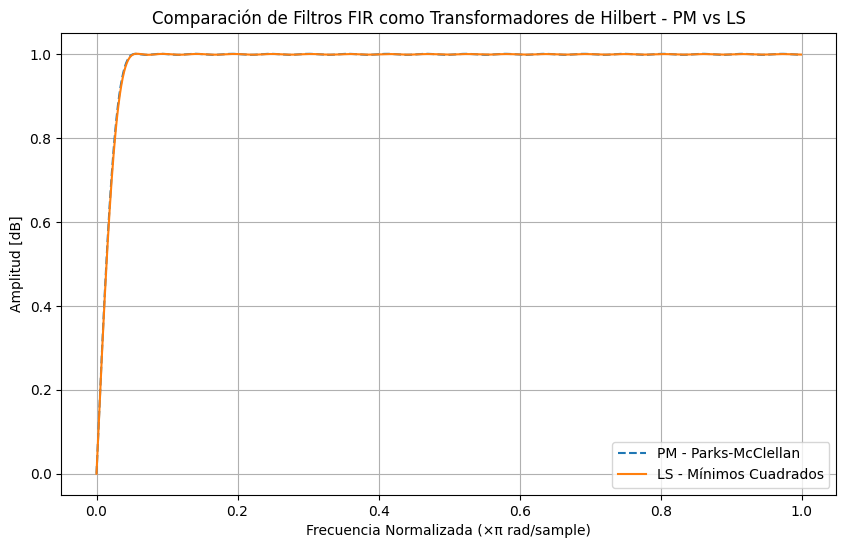

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from pytc2.filtros_digitales import fir_design_pm, fir_design_ls

# Parámetros comunes del derivador FIR
Ftype = 'h'  # Hilbert
order = 71  # Orden del filtro (debe ser par para tipo III)
fs = 2.0  # Frecuencia de muestreo
lgrid = 16  # Densidad del grid

# Bandas y especificaciones del derivador
band_edges = [0.05, 1.0]  # Bandas de diseño (en términos de frecuencia normalizada)
desired = [1., 1.]  # Respuesta ideal del derivador (pendiente lineal en la banda de paso)
W = [1., 1.]  # Peso en las bandas

# Diseño del filtro con PM
b_pm, _, _ = fir_design_pm(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Diseño del filtro con LS
b_ls = fir_design_ls(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Comparar la respuesta en frecuencia de ambos filtros
w, h_pm = freqz(b_pm, worN=1024)
w, h_ls = freqz(b_ls, worN=1024)

# Graficar ambas respuestas
plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, np.abs(h_pm), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, np.abs(h_ls), label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Comparación de Filtros FIR como Transformadores de Hilbert - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()



## Aplicaciones

### Modulaciones de amplitud y fase (AM, PM y FM)

En el siguiente ejemplo se aplicarán filtros FIR tipo IV, uno en configuración derivador y el otro como rotador de fase o transformador de Hilbert. En ambos casos se utilizarán para la demodulación a partir de la construcción de la *señal analítica*.

### Transformada de Hilbert y Señal Analítica

La transformada de Hilbert de una señal $s$, se define en el dominio de la frecuencia como:

$$H\{s\} = -j \cdot \text{sgn}(\Omega) \cdot S(\Omega) $$

es decir que si construimos una señal compleja, *la señal analítica*, formada por

$$s_a = s + j \cdot H\{s\}$$

cuyo espectro solo tiene energía en la parte positiva del espectro

$$ S_a(\Omega) = \begin{cases}
2 \cdot S_a(\Omega) & \text{si } \Omega > 0 \\
S_a(\Omega) & \text{si } \Omega = 0 \\
0 & \text{si } \Omega < 0 \\
\end{cases}$$

Más interesante aún es cuando se representa en forma polar, ya que

- Envolvente: $A(t) = |s_a(t)|$
- Fase instantánea: $\varphi(t) = \arg\{s_a(t)\}$
- Frecuencia instantánea: $f_i(t) = \frac{1}{2\pi}\frac{d\varphi(t)}{dt}$

Es decir, que la modulación de amplitud estará presente en el módulo de la señal analítica, mientras que la fase será el argumento o fase compleja. Luego la frecuencia será proporcional a la derivada de la fase. Está claro que tanto el filtro transformador de hilbert es clave en la formulación de la señal analítica $s_a$, y el derivador podrá usarse en la demodulación de FM.


## Resumen de modulaciones de amplitud y fase

Para cada modulación se hará un breve resumen de las ecuaciones más importantes para la modulación y demodulación a partir de la señal analítica.

### Modulación AM

**Señal modulada:**
$$s_{AM}(t) = A[1 + m(t)]\cos(\omega_c t)$$

**Señal analítica:**
$$s_{a,AM}(t) = A[1 + m(t)]e^{j\omega_c t}$$

**Demodulación:**
$$\hat{m}(t) = \frac{|s_{a,AM}(t)| - A}{A}$$

Para los siguientes ejemplos se usarán señales sintéticas compuertas por senoidales pesadas de la siguiente manera:

$$m_0 = 0.5\sin(2\pi f_1t) + 0.3\sin(2\pi f_2t) + 0.2\sin(2\pi f_3t)$$

donde $f_1 = 5$ Hz, $f_2 = 3$ Hz, y $f_3 = 7$ Hz.

La señal se normaliza para garantizar $|m| \leq 1$:

$$m = \frac{m_0}{\max(|m_0|)}$$


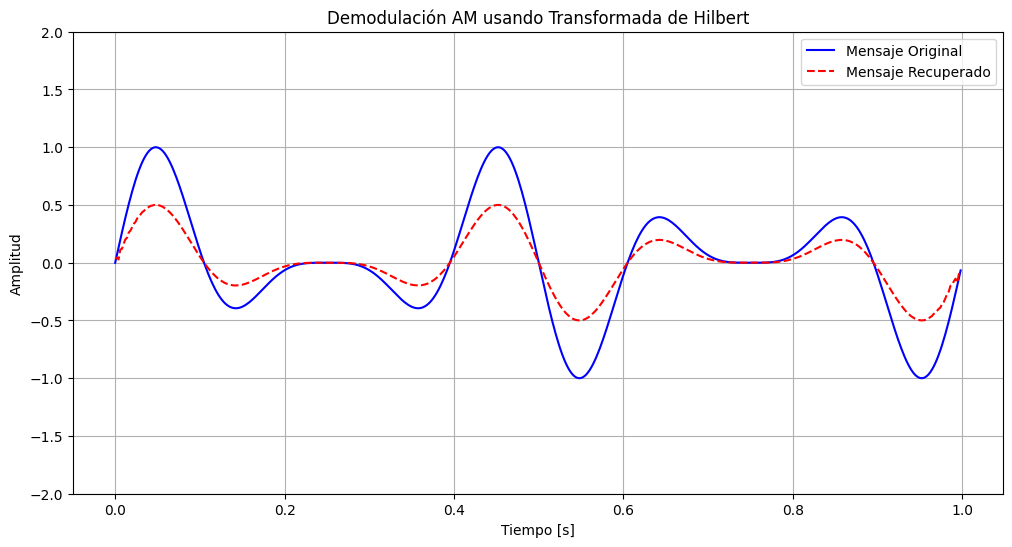

In [10]:

# Parámetros de la señal
fs = 500  # Frecuencia de muestreo
t = np.arange(0, 1, 1/fs)  # Vector de tiempo de 1 segundo
fc = 50  # Frecuencia de la portadora

# Generar señal mensaje
def generar_mensaje(t):
    # Crear una señal mensaje arbitraria normalizada entre -1 y +1
    mensaje = 0.5 * np.sin(2 * np.pi * 5 * t) + \
              0.3 * np.sin(2 * np.pi * 3 * t) + \
              0.2 * np.sin(2 * np.pi * 7 * t)
    return mensaje / np.max(np.abs(mensaje))  # Normalizar

# Generar señal portadora
portadora = np.cos(2 * np.pi * fc * t)

# Generar mensaje
mensaje = generar_mensaje(t)

# Función para aplicar el filtro de Hilbert y obtener la señal analítica
def obtener_senal_analitica(senal, b_hilbert):
    # Aplicar el filtro de Hilbert
    senal_hilbert = np.convolve(senal, b_hilbert, mode='same')
    # Formar la señal analítica
    senal_analitica = senal + 1j * senal_hilbert
    return senal_analitica

# Función para visualizar resultados
def plotear_resultados(t, mensaje_original, mensaje_recuperado, titulo):
    plt.figure(figsize=(12, 6))
    ax = plt.gca()
    plt.plot(t, mensaje_original, 'b-', label='Mensaje Original')
    plt.plot(t, mensaje_recuperado, 'r--', label='Mensaje Recuperado')
    ax.set_ylim([-2, 2])
    plt.grid(True)
    plt.legend()
    plt.title(titulo)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.show()

# 1. Modulación AM
def ejemplo_AM(mensaje, portadora, b_hilbert):
    # Generar señal AM (1 + m(t))*cos(wc*t)
    senal_AM = (1 + mensaje) * portadora
    
    # Obtener señal analítica
    senal_analitica = obtener_senal_analitica(senal_AM, b_hilbert)
    
    # Recuperar envolvente
    envolvente = np.abs(senal_analitica)
    
    # Normalizar y centrar la envolvente recuperada
    mensaje_recuperado = (envolvente - np.mean(envolvente)) / (np.max(envolvente) - np.min(envolvente))
    
    return mensaje_recuperado


# Ejecutar ejemplos
mensaje_recuperado_AM = ejemplo_AM(mensaje, portadora, b_hilbert)

# Visualizar resultados
plotear_resultados(t, mensaje, mensaje_recuperado_AM, 'Demodulación AM usando Transformada de Hilbert')


### 3.2 Modulación PM
**Señal modulada:**
$$s_{PM}(t) = A\cos(\omega_c t + \beta m(t))$$

**Señal analítica:**
$$s_{a,PM}(t) = Ae^{j(\omega_c t + \beta m(t))}$$

siendo $\beta$ típicamente < $\pi/2$ para minimizar distorsión.
 
**Demodulación:**
$$\hat{m}(t) = \frac{1}{\beta}[\arg\{s_{a,PM}(t)\} - \omega_c t]$$


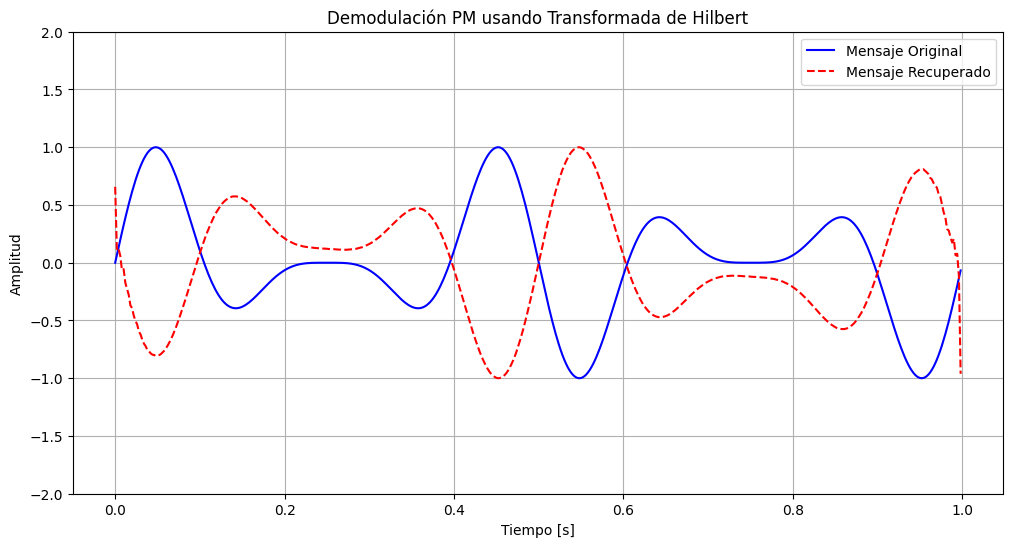

In [11]:
# 2. Modulación PM
def ejemplo_PM(mensaje, portadora, b_hilbert):
    # Índice de modulación
    beta = np.pi/4
    
    # Generar señal PM cos(wc*t + β*m(t))
    senal_PM = np.cos(2*np.pi*fc*t + beta*mensaje)
    
    # Obtener señal analítica
    senal_analitica = obtener_senal_analitica(senal_PM, b_hilbert)
    
    # Recuperar fase instantánea
    fase_inst = np.unwrap(np.angle(senal_analitica))
    
    # Extraer mensaje (eliminar tendencia lineal de la fase)
    tendencia = np.polyfit(t, fase_inst, 1)
    fase_detrend = fase_inst - np.polyval(tendencia, t)
    
    # Normalizar mensaje recuperado
    mensaje_recuperado = fase_detrend / np.max(np.abs(fase_detrend))
    
    return mensaje_recuperado


mensaje_recuperado_PM = ejemplo_PM(mensaje, portadora, b_hilbert)

# Visualizar resultados
plotear_resultados(t, mensaje, mensaje_recuperado_PM, 'Demodulación PM usando Transformada de Hilbert')


### Modulación FM
**Señal modulada:**
$$s_{FM}(t) = A\cos\left(\omega_c t + \beta \int_{-\infty}^t m(\tau)d\tau\right)$$

**Señal analítica:**
$$s_{a,FM}(t) = Ae^{j(\omega_c t + \beta \int_{-\infty}^t m(\tau)d\tau)}$$

**Demodulación:**
$$\hat{m}(t) = \frac{1}{\beta}\frac{d}{dt}[\arg\{s_{a,FM}(t)\} - \omega_c t]$$

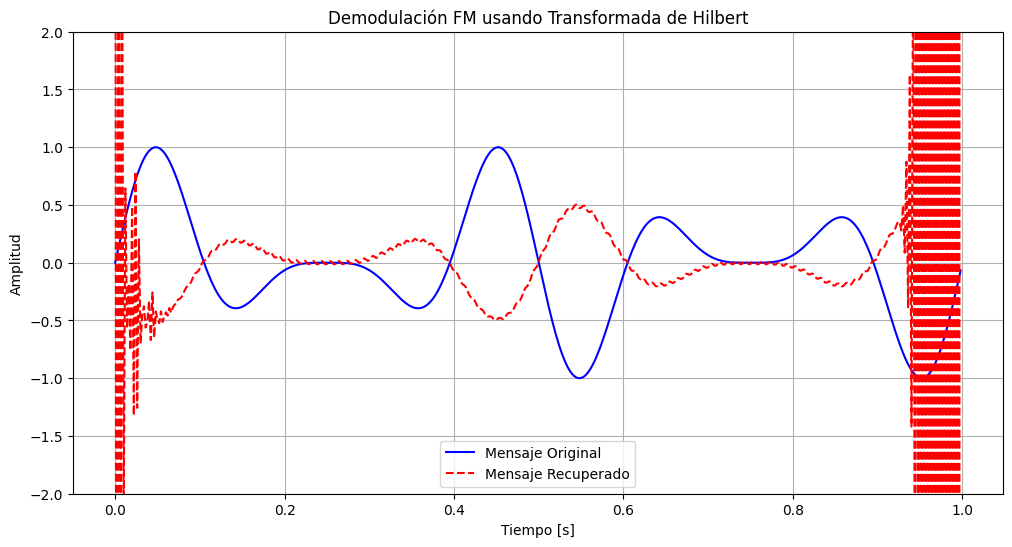

In [18]:


# 3. Modulación FM (nueva)
def ejemplo_FM(mensaje, portadora, b_hilbert):
    # Índice de modulación FM
    beta = 10
    
    # Integral del mensaje para la modulación FM
    mensaje_int = np.cumsum(mensaje) / fs
   
    # Generar señal FM cos(wc*t + β*integral(m(t)))
    senal_FM = np.cos(2*np.pi*fc*t + beta*mensaje_int)
 
    # senal_FM = np.cos(2*np.pi*(fc+beta*mensaje)*t)
    
    # Obtener señal analítica
    senal_analitica = obtener_senal_analitica(senal_FM, b_hilbert)
    
    # Obtener fase instantánea
    fase_inst = np.unwrap(np.angle(senal_analitica))
    
    # Derivar la fase para obtener el mensaje
    mensaje_recuperado = np.convolve(fase_inst, b_derivador, mode='same')
    
    # Normalizar
    # mensaje_recuperado = mensaje_recuperado / np.max(np.abs(mensaje_recuperado[]))

    borde = int(0.1*fs)
    parte_centrarl = mensaje_recuperado[borde:-borde]
    mensaje_recuperado = (mensaje_recuperado - np.mean(parte_centrarl)) / (np.max(parte_centrarl) - np.min(parte_centrarl))
    
    return mensaje_recuperado


mensaje_recuperado_FM = ejemplo_FM(mensaje, portadora, b_hilbert)

# Visualizar resultados
plotear_resultados(t, mensaje, mensaje_recuperado_FM, 'Demodulación FM usando Transformada de Hilbert')
